In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define lattice dimensions
nx, ny = 5, 5

# Define clusters and their coefficients
clusters = [    [[[0, 0], [1, 0]], 0.1],
    [[[0, 0], [0, 1]], 0.2],
    [[[0, 0], [1, 0], [0, 1]], -0.1],
]

# Define function to calculate the energy of a single cluster
def cluster_energy(cluster, coefficient, occupancy):
    energy = 0
    for c in cluster:
        cluster_energy = coefficient 
        for site in c:
            x, y = site
            if (x >= nx) or (y >= ny):
                cluster_energy = 0
                break
            if occupancy[x, y] == 0:
                cluster_energy = 0
                break
        energy += cluster_energy
    return energy

# Randomly set occupancy variables for each lattice site
occupancy = np.random.randint(0, 2, size=(nx, ny))

# Calculate the total energy and cluster energies
N_steps=0
total_energy = 0
grand_total_energy=-9999
cluster_energies = []
for cluster, coefficient in clusters:
    energy = 0
    for i in range(nx):
        for j in range(ny):
            # Translate cluster to current position and calculate energy
            translated_cluster = [[np.array(site) + np.array([i, j]) for site in cluster]]
            c_energy = cluster_energy(translated_cluster, coefficient, occupancy)
            energy += c_energy 
            if c_energy != 0:
                N_steps += 1
    cluster_energies.append(energy)
    total_energy += energy
    if total_energy>grand_total_energy:
        grand_total_energy=total_energy


# Create plot
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(10, 5))

# Define function to update plot
def update_plot(frame):
    counter=0
    ax1.clear()
    ax1.set_aspect("equal")
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlim(0, nx)
    ax1.set_ylim(0, ny)
    ax1.set_title(f'2d alloy')
    
    ax2.clear()
    ax2.set_xlim(0,nx*nx*len(clusters))
    ax2.set_ylim(0,grand_total_energy)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Total energy")
    
    for i in range(nx):
        for j in range(ny):
            xy = np.array([[i, j], [i + 1, j], [i + 1, j + 1], [i, j + 1]])
            color = "k" if occupancy[i, j] else "none"
            poly = Polygon(xy, facecolor=color, edgecolor="k")
            ax1.add_patch(poly)

    total_energy = 0
    energy_list = []
    N=0
    for cluster, coefficient in clusters:
        for i in range(nx):
            for j in range(ny):
                # Translate cluster to current position and calculate energy
                translated_cluster = [[np.array(site) + np.array([i, j]) for site in cluster]]
                energy = cluster_energy(translated_cluster, coefficient, occupancy)
                total_energy += energy
                energy_list.append(total_energy)
                counter +=1
                if energy !=0:                    
                    if counter == frame:  
                        for sites in translated_cluster:
                            for site in sites:
                                #print(site)
                                N=len(energy_list)
                                x, y = site[0], site[1]
                                xy = np.array([[x, y], [x + 1, y], [x + 1, y + 1], [x, y + 1]])
                                color = "b"
                                poly = Polygon(xy, facecolor=color, edgecolor="r")
                                ax1.add_patch(poly)
                if energy ==0:                    
                    if counter == frame:  
                        for sites in translated_cluster:
                            for site in sites:
                                #print(site)
                                N=len(energy_list)
                                x, y = site[0], site[1]
                                xy = np.array([[x, y], [x + 1, y], [x + 1, y + 1], [x, y + 1]])
                                color = "r"
                                poly = Polygon(xy, facecolor=color, edgecolor="r")
                                ax1.add_patch(poly)

    ax2.plot(range(frame), energy_list[0:frame], 'b-')

# Create animation
animation = FuncAnimation(fig, update_plot, frames=nx*ny*len(clusters), interval=100)


# Display animation
HTML(animation.to_jshtml())

animation.save('CE.gif', writer = 'pillow', fps=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Define lattice dimensions
nx, ny = 5, 5

# Define clusters and their coefficients
clusters = [    [[[0, 0], [1, 0]], 0.1],
    [[[0, 0], [0, 1]], 0.2],
    [[[0, 0], [1, 0], [0, 1]], -0.1],
]

# Define function to calculate the energy of a single cluster
def cluster_energy(cluster, coefficient, occupancy):
    energy = 0
    for c in cluster:
        cluster_energy = coefficient 
        for site in c:
            x, y = site
            if (x >= nx) or (y >= ny):
                cluster_energy = 0
                break
            if occupancy[x, y] == 0:
                cluster_energy = 0
                break
        energy += cluster_energy
    return energy

# Randomly set occupancy variables for each lattice site
occupancy = np.random.randint(0, 2, size=(nx, ny))

# Calculate the total energy and cluster energies
total_energy = 0
cluster_energies = []
for cluster, coefficient in clusters:
    energy = 0
    for i in range(nx):
        for j in range(ny):
            # Translate cluster to current position and calculate energy
            translated_cluster = [[np.array(site) + np.array([i, j]) for site in cluster]]
            energy += cluster_energy(translated_cluster, coefficient, occupancy)
    cluster_energies.append(energy)
    total_energy += energy

# Plot the lattice without clusters marked out
fig, ax  = plt.subplots(1,4)
ax.set_aspect("equal")
ax.set_xticks([])
ax.set_yticks([])
for i in range(nx):
    for j in range(ny):
        xy = np.array([[i, j], [i + 1, j], [i + 1, j + 1], [i, j + 1]])
        color = "k" if occupancy[i, j] else "none"
        poly = Polygon(xy, facecolor=color, edgecolor="k")
        ax.add_patch(poly)
ax.set_xlim(0, nx)
ax.set_ylim(0, ny)
ax.set_title("A 2d alloy")
plt.show()

# Plot each cluster individually
for i, (cluster, coefficient) in enumerate(clusters):
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    for site in cluster:
        x, y = site[0]+nx/2.-1, site[1]+ny/2.-1
        xy = np.array([[x, y], [x + 1, y], [x + 1, y + 1], [x, y + 1]])
        color = "r"
        poly = Polygon(xy, facecolor=color, edgecolor="r")
        ax.add_patch(poly)
    ax.set_xlim(0, nx)
    ax.set_ylim(0, ny)
    plt.show()

E_guess = input("The energy of the system is defined by the number of cluster of each type that you can fit over black pathes of the alloy. What is the expected energy of the system?")


# Print total energy and cluster energies
print("True total energy: ", total_energy," Your guess?",E_guess)
for i, energy in enumerate(cluster_energies):
    print("Cluster {} energy: {}".format(i+1, energy))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define lattice dimensions
nx, ny = 5, 5

# Generate lattice coordinates
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)

# Define the unit cell
unit_cell = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Plot the lattice
fig, ax = plt.subplots()
ax.scatter(X, Y, c='r', marker='o', s=50)
ax.plot(unit_cell[:, 0], unit_cell[:, 1], color='k', linewidth=2)
ax.set_xlim(-0.5, nx-0.5)
ax.set_ylim(-0.5, ny-0.5)

ax.set_xlabel(r'$\vec{a}_1$',fontsize=14)
ax.set_ylabel(r'$\vec{a}_2$',fontsize=14)
ax.set_aspect('equal')
plt.show()

In [ ]:
# Define lattice dimensions
nx, ny, nz = 5, 5, 5

# Generate lattice coordinates
x = np.arange(nx)
y = np.arange(ny)
z = np.arange(nz)
X, Y, Z = np.meshgrid(x, y, z)

# Plot the lattice
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='b', marker='o', edgecolor='k',s=150)

ax.set_xlabel(r'$\vec{a}_1$',fontsize=14)
ax.set_ylabel(r'$\vec{a}_2$',fontsize=14)
ax.set_zlabel(r'$\vec{a}_3$',fontsize=14)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define lattice dimensions
nx, ny = 5, 5

# Generate lattice coordinates
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)

# Define clusters
clusters = [
    [[0, 0], [1, 0], [1, 1]],
    [[0, 3], [1, 3] ],
    [[2, 2], [3, 2], [3, 3], [4,3]]
]

# Plot the lattice
fig, ax = plt.subplots()
ax.scatter(X, Y, c='lightgray', marker='o', s=50, zorder=0)

# Highlight the clusters
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    for j in range(len(cluster)-1):
        x, y = cluster[j]
        x2, y2 = cluster[j+1]
        if x == x2 or y == y2:  # check if line segment is vertical or horizontal
            ax.plot([x, x2], [y, y2], color=colors[i], linewidth=3, zorder=1)

ax.set_xlim(-0.5, nx-0.5)
ax.set_ylim(-0.5, ny-0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define lattice dimensions
nx, ny = 5, 5

# Define clusters and their coefficients
clusters = [    [[[0, 0], [1, 0]], 0.1],
    [[[0, 0], [0, 1]], 0.2],
    [[[0, 0], [1, 0], [0, 1]], -0.1],
]

# Define function to calculate the energy of a single cluster
def cluster_energy(cluster, coefficient, occupancy):
    energy = 0
    for c in cluster:
        cluster_energy = coefficient 
        for site in c:
            x, y = site
            if (x >= nx) or (y >= ny):
                cluster_energy = 0
                break
            if occupancy[x, y] == 0:
                cluster_energy = 0
                break
        energy += cluster_energy
    return energy

# Randomly set occupancy variables for each lattice site
occupancy = np.random.randint(0, 2, size=(nx, ny))

# Calculate the total energy and cluster energies
N_steps=0
total_energy = 0
grand_total_energy=-9999
cluster_energies = []
for cluster, coefficient in clusters:
    energy = 0
    for i in range(nx):
        for j in range(ny):
            # Translate cluster to current position and calculate energy
            translated_cluster = [[np.array(site) + np.array([i, j]) for site in cluster]]
            c_energy = cluster_energy(translated_cluster, coefficient, occupancy)
            energy += c_energy 
            if c_energy != 0:
                N_steps += 1
    cluster_energies.append(energy)
    total_energy += energy
    if total_energy>grand_total_energy:
        grand_total_energy=total_energy


# Create plot
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(10, 5))

# Define function to update plot
def update_plot(frame):
    counter=0
    ax1.clear()
    ax1.set_aspect("equal")
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlim(0, nx)
    ax1.set_ylim(0, ny)
    ax1.set_title(f'2d alloy')
    
    ax2.clear()
    ax2.set_xlim(0,nx*nx*len(clusters))
    ax2.set_ylim(0,grand_total_energy)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Total energy")
    
    for i in range(nx):
        for j in range(ny):
            xy = np.array([[i, j], [i + 1, j], [i + 1, j + 1], [i, j + 1]])
            color = "k" if occupancy[i, j] else "none"
            poly = Polygon(xy, facecolor=color, edgecolor="k")
            ax1.add_patch(poly)

    total_energy = 0
    energy_list = []
    N=0
    for cluster, coefficient in clusters:
        for i in range(nx):
            for j in range(ny):
                # Translate cluster to current position and calculate energy
                translated_cluster = [[np.array(site) + np.array([i, j]) for site in cluster]]
                energy = cluster_energy(translated_cluster, coefficient, occupancy)
                total_energy += energy
                energy_list.append(total_energy)
                counter +=1
                if energy !=0:                    
                    if counter == frame:  
                        for sites in translated_cluster:
                            for site in sites:
                                #print(site)
                                N=len(energy_list)
                                x, y = site[0], site[1]
                                xy = np.array([[x, y], [x + 1, y], [x + 1, y + 1], [x, y + 1]])
                                color = "b"
                                poly = Polygon(xy, facecolor=color, edgecolor="r")
                                ax1.add_patch(poly)
                if energy ==0:                    
                    if counter == frame:  
                        for sites in translated_cluster:
                            for site in sites:
                                #print(site)
                                N=len(energy_list)
                                x, y = site[0], site[1]
                                xy = np.array([[x, y], [x + 1, y], [x + 1, y + 1], [x, y + 1]])
                                color = "r"
                                poly = Polygon(xy, facecolor=color, edgecolor="r")
                                ax1.add_patch(poly)

    ax2.plot(range(frame), energy_list[0:frame], 'b-')

# Create animation
animation = FuncAnimation(fig, update_plot, frames=nx*ny*len(clusters), interval=100)


# Display animation
HTML(animation.to_jshtml())

animation.save('CE.gif', writer = 'pillow', fps=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set up figure and axis
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].set_aspect('equal')
axs[0].set_xlim(0, 10)
axs[0].set_ylim(0, 10)
axs[0].set_title('Quantum Numbers')
axs[0].set_xlabel(r'n$_x$')
axs[0].set_ylabel(r'n$_y$')
axs[1].set_xlabel('Energy')
axs[1].set_ylabel('DOS')
axs[1].set_yticklabels([])
axs[1].set_xticklabels([])
axs[1].set_title('Density of States')
axs[1].set_xlim(0, 100)
axs[1].set_ylim(0, 10*np.pi/3.)

N_frames=100

# Generate list of quantum numbers
n_max = 10
n_list = [(n_x, n_y) for n_x in range(1, n_max + 1) for n_y in range(1, n_max + 1) ]

# Generate energy and DOS data
E = np.linspace(0, 100, N_frames)

DOS=E**(0.5)*np.pi/3.

# Set up plot objects
circle = plt.Circle((0, 0), 0, fill=False, color='r')
axs[0].add_patch(circle)
line, = axs[1].plot([], [], lw=2)

# Define animation function
def animate(frame):
    r = frame / 10
    
    circle.set_radius(r)
    x = []
    y = []
    states = []
    for n in n_list:
        n_x, n_y = round(n[0]), round(n[1])
        if np.sqrt(n_x**2 + n_y**2) <= r:
            x.append(n_x)
            y.append(n_y)
            states.append((n_x**2 + n_y**2))
    
    axs[0].scatter(x, y, color='b')
    
    axs[1].hist(states,bins=np.arange(0,100,10),color='black')
    line.set_data(E[0:int(r*r)], DOS[0:int(r*r)])

# Create animation object
anim = FuncAnimation(fig, animate, frames=N_frames, interval=50, blit=False)

# Save animation
anim.save('dos_animation.gif', writer='pillow')


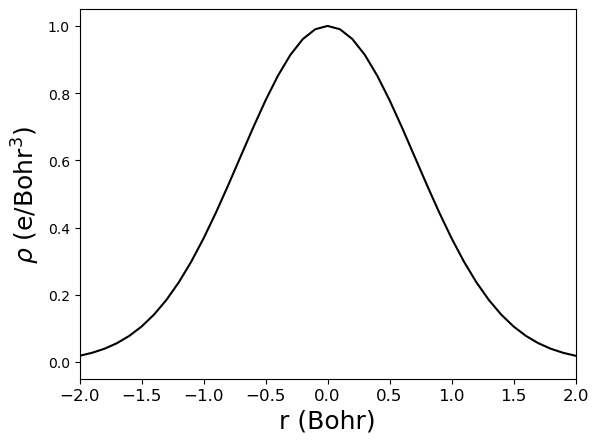

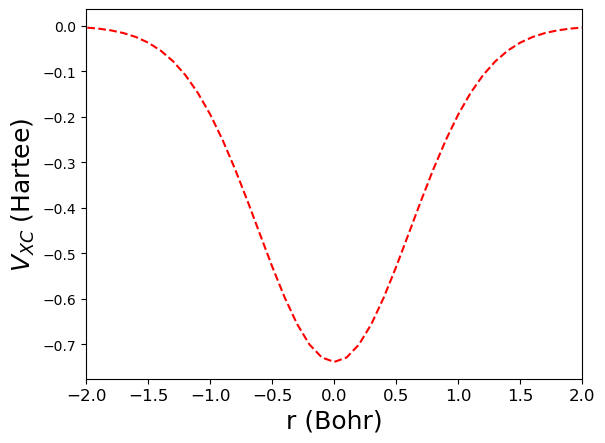

In [25]:

import numpy as np
import matplotlib.pyplot as plt
C_F=2.87
r=np.arange(-4,4,0.1)
rho=np.exp(-r**2)
V=-(3/4.)*(3/np.pi)**(1/3.)*rho**(4/3.)
 #*4*np.pi*r*r
plt.xlim(-2,2)
plt.rc('xtick', labelsize=12)
plt.rc('axes', labelsize=18)
plt.ylabel(r'$\rho$ (e/Bohr$^3$)')
plt.xlabel(r'r (Bohr)')
plt.plot(r,rho,color="black")
plt.show()
plt.xlim(-2,2)
plt.rc('xtick', labelsize=12)
plt.rc('axes', labelsize=18)
plt.ylabel(r'$V_{XC}$ (Hartee)')
plt.xlabel(r'r (Bohr)')
plt.plot(r,V,'--',color="red")
plt.show()

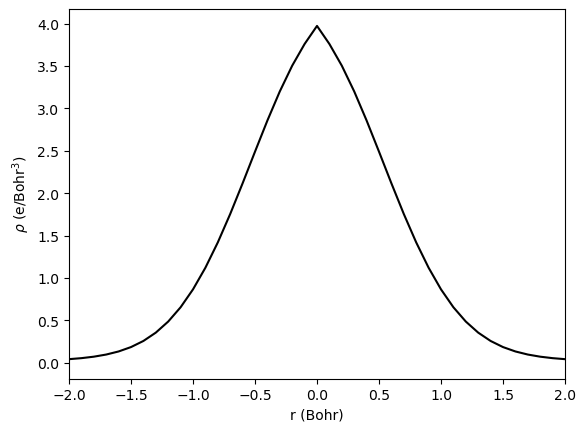

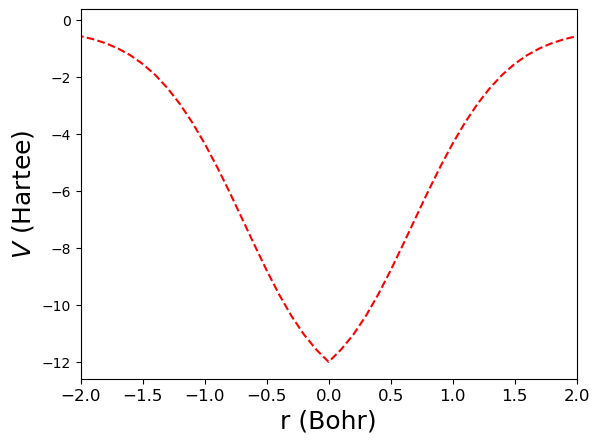

In [1]:

import numpy as np
import matplotlib.pyplot as plt
C_F=2.87
r=np.arange(-4,4,0.1)
V=-np.exp(-r**2)-0.1/(np.abs(r)+0.5)
V=V*10
rho=(5*2.87/3.)**(-3/2.)*(-V)**(3/2.) #*4*np.pi*r*r
plt.xlim(-2,2)
plt.rc('xtick', labelsize=12)
plt.rc('axes', labelsize=18)
plt.ylabel(r'$\rho$ (e/Bohr$^3$)')
plt.xlabel(r'r (Bohr)')
plt.plot(r,rho,color="black")
plt.show()
plt.xlim(-2,2)
plt.rc('xtick', labelsize=12)
plt.rc('axes', labelsize=18)
plt.ylabel(r'$V$ (Hartee)')
plt.xlabel(r'r (Bohr)')
plt.plot(r,V,'--',color="red")
plt.show()

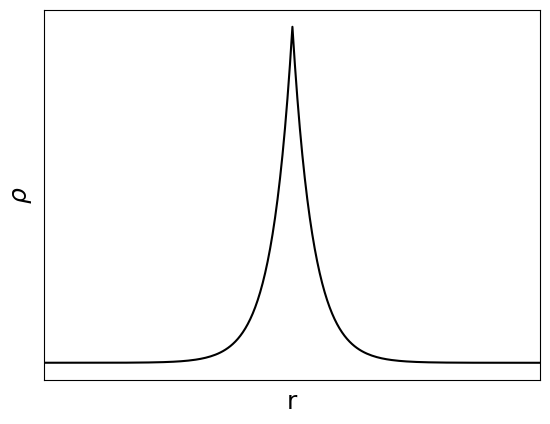

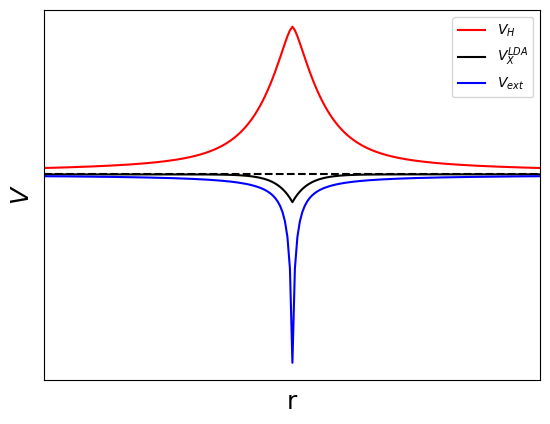

In [78]:
# The various potentials in DFT  (LDA)
import numpy as np
import matplotlib.pyplot as plt


r=np.arange(-4,4,0.01)
rho=np.exp(-abs(r)*12.)
V_LDA=-(3/4.)*(3/np.pi)**(1/3.)*rho**(4/3.)
V_ext= -0.05/(abs(r)+0.01)


V_H=[]
for rr in r:
    V_H.append( np.trapz(rho/ (abs(r-rr) +0.01)  ))

V_H=np.array(V_H)/100.


plt.xlim(-1,1)
plt.xticks([])
plt.yticks([])
plt.rc('xtick', labelsize=12)
plt.rc('axes', labelsize=18)
plt.ylabel(r'$\rho$')
plt.xlabel(r'r')
plt.plot(r,rho,color="black")
plt.show()
plt.xlim(-1,1)
plt.rc('xtick', labelsize=12)
plt.rc('axes', labelsize=18)
plt.ylabel(r'$V$')
plt.xlabel(r'r')
plt.xticks([])
plt.yticks([])
plt.plot(r,V_H,color="red",label=r"$V_H$")
plt.plot(r,V_LDA,color="black",label=r"$V^{LDA}_{X}$")
plt.plot([-1,1],[0,0],"--",color="black")
plt.plot(r,V_ext,color="blue",label=r"$V_{ext}$")
plt.legend()
plt.show()

# TEXT TO SPEECH

In [ ]:
import pyttsx3
import winsound
import time

duration = 400  # milliseconds
freq = 440  # Hz

winsound.Beep(freq, duration)

def speak(text):
    engine = pyttsx3.init()
    # Set the voice to a voice similar to Stephen Hawking's voice
    voice_id = "english_rp+whisper"
    engine.setProperty('voice', voice_id)
    # Set the pace to a slower speed
    engine.setProperty('rate', 125)
    engine.say(text)
    engine.runAndWait()

p = '''
10.
9.
8.
7.
6.
5.
4.
3. 
2. 
1. 
Action!
'''
speak(p)

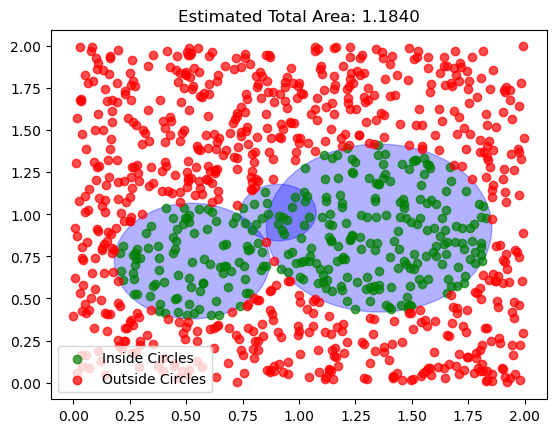

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate random points within the entire bounding square
def generate_random_points(num_points, bounding_square_side):
    return np.random.rand(num_points, 2) * bounding_square_side

# Function to check if a point is inside any circle
def is_inside_any_circle(point, circles):
    for circle in circles:
        if np.linalg.norm(point - circle['center']) < circle['radius']:
            return True
    return False

# Function to update the plot for each frame of the animation
def update_plot(ax, points, circles, estimated_area):
    ax.clear()

    # Plot circles
    for circle in circles:
        circle_patch = plt.Circle(circle['center'], circle['radius'], color='blue', alpha=0.3)
        ax.add_patch(circle_patch)

    # Plot points inside circles in green (if any)
    points_inside = [point for point in points if is_inside_any_circle(point, circles)]
    if points_inside:
        points_inside = np.array(points_inside)
        ax.scatter(points_inside[:, 0], points_inside[:, 1], color='green', label='Inside Circles', alpha=0.7)

    # Plot points outside circles in red
    points_outside = [point for point in points if not is_inside_any_circle(point, circles)]
    if points_outside:
        points_outside = np.array(points_outside)
        ax.scatter(points_outside[:, 0], points_outside[:, 1], color='red', label='Outside Circles', alpha=0.7)

    ax.set_title(f'Estimated Total Area: {estimated_area:.4f}')
    ax.legend()

# Parameters
num_circles = 3
num_points = 1000
bounding_square_side = 2.0

# Create circles with random radii and centers within the bounding square
circles = [{'radius': np.random.rand() * bounding_square_side / 4,
            'center': np.random.rand(2) * (bounding_square_side - 2 * np.random.rand() * bounding_square_side / 4) + np.random.rand() * bounding_square_side / 4}
           for _ in range(num_circles)]

# Ensure that circles are entirely within the bounding square
for circle in circles:
    while circle['center'][0] - circle['radius'] < 0 or circle['center'][0] + circle['radius'] > bounding_square_side or \
            circle['center'][1] - circle['radius'] < 0 or circle['center'][1] + circle['radius'] > bounding_square_side:
        circle['center'] = np.random.rand(2) * (bounding_square_side - 2 * np.random.rand() * bounding_square_side / 4) + np.random.rand() * bounding_square_side / 4

# Calculate bounding square area
bounding_square_area = bounding_square_side ** 2

# Create animation
num_frames = 10
fig, ax = plt.subplots()
for frame in range(num_frames):
    # Generate random points covering the entire bounding square
    points = generate_random_points(num_points, bounding_square_side)

    # Estimate total area using Monte Carlo integration
    points_inside = [point for point in points if is_inside_any_circle(point, circles)]
    estimated_area = (len(points_inside) / num_points) * bounding_square_area

    # Update plot for each frame
    update_plot(ax, points, circles, estimated_area)

    # Delay for visualization
    plt.pause(0.5)

# Show the final result
plt.show()


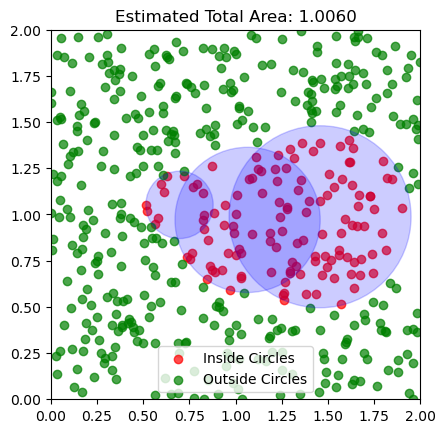

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO

# Function to generate random points within the entire bounding square
def generate_random_points(num_points, bounding_square_side):
    return np.random.rand(num_points, 2) * bounding_square_side

# Function to check if a point is inside any circle
def is_inside_any_circle(point, circles):
    for circle in circles:
        if np.linalg.norm(point - circle['center']) < circle['radius']:
            return True
    return False

# Function to update the plot for each frame of the animation
def update_plot(ax, points, circles, bounding_square_side, estimated_area):
    ax.clear()

    # Plot square area with equal aspect ratio
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([0, bounding_square_side])
    ax.set_ylim([0, bounding_square_side])

    # Plot points inside circles in red
    points_inside = [point for point in points if is_inside_any_circle(point, circles)]
    if points_inside:
        points_inside = np.array(points_inside)
        ax.scatter(points_inside[:, 0], points_inside[:, 1], color='red', label='Inside Circles', alpha=0.7)

    # Plot points outside circles in green
    points_outside = [point for point in points if not is_inside_any_circle(point, circles)]
    if points_outside:
        points_outside = np.array(points_outside)
        ax.scatter(points_outside[:, 0], points_outside[:, 1], color='green', label='Outside Circles', alpha=0.7)

    # Plot circles
    for circle in circles:
        circle_patch = plt.Circle(circle['center'], circle['radius'], color='blue', alpha=0.2)
        ax.add_patch(circle_patch)

    ax.set_title(f'Estimated Total Area: {estimated_area:.4f}')
    ax.legend()

# Parameters
num_circles = 3
num_points = 1000
bounding_square_side = 2.0

# Create circles with random radii and centers within the bounding square
circles = [{'radius': np.random.rand() * bounding_square_side / 4,
            'center': np.random.rand(2) * (bounding_square_side - 2 * np.random.rand() * bounding_square_side / 4) + np.random.rand() * bounding_square_side / 4}
           for _ in range(num_circles)]

# Ensure that circles are entirely within the bounding square
for circle in circles:
    while circle['center'][0] - circle['radius'] < 0 or circle['center'][0] + circle['radius'] > bounding_square_side or \
            circle['center'][1] - circle['radius'] < 0 or circle['center'][1] + circle['radius'] > bounding_square_side:
        circle['center'] = np.random.rand(2) * (bounding_square_side - 2 * np.random.rand() * bounding_square_side / 4) + np.random.rand() * bounding_square_side / 4

# Calculate bounding square area
bounding_square_area = bounding_square_side ** 2

# Create animation frames
num_frames = 500
frames = []

fig, ax = plt.subplots()

# Initialize points with a single point at the center
points = np.array([[bounding_square_side / 2, bounding_square_side / 2]])

for frame in range(num_frames):
    # Add one more random point
    new_point = np.random.rand(1, 2) * bounding_square_side
    points = np.concatenate([points, new_point], axis=0)

    # Estimate total area using Monte Carlo integration
    points_inside = [point for point in points if is_inside_any_circle(point, circles)]
    estimated_area = (len(points_inside) / len(points)) * bounding_square_area

    # Update plot for each frame
    update_plot(ax, points, circles, bounding_square_side, estimated_area)

    # Save current frame in-memory
    buffer = BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    frames.append(Image.open(buffer))

# Save frames as an animated GIF
gif_filename = "monte_carlo_animation.gif"
frames[0].save(gif_filename, save_all=True, append_images=frames[1:], duration=200, loop=0)

# Show the final result
plt.show()
